In [2]:
import numpy as np
from qiskit import *


In [3]:
# full adder
# inputs  - 0=A 1=B 2=Carry in
# outputs - 2=Sum 3=Carry out 
fa = QuantumCircuit(4)
fa.ccx(0,1,3)
fa.cx(0,1)
fa.ccx(1,2,3)
fa.cx(1,2)
fa.cx(0,1)

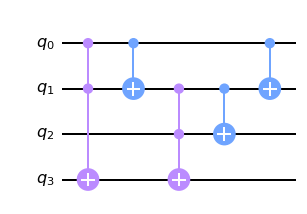

In [4]:
fa.draw('mpl')

In [5]:
fullAdder=fa.to_gate(label='fullAdder')

In [6]:
twoBitAdd=QuantumCircuit(7,3)
# simulation: adds '10' and '11', should get output '101'
twoBitAdd.x(1)
twoBitAdd.x(4)
twoBitAdd.x(5)
twoBitAdd.barrier([0,1,2,3,4,5,6])
twoBitAdd.append(fullAdder,[0,1,2,3])
twoBitAdd.append(fullAdder,[4,5,3,6])
twoBitAdd.barrier([0,1,2,3,4,5,6])
twoBitAdd.measure([2,3,6],[0,1,2])

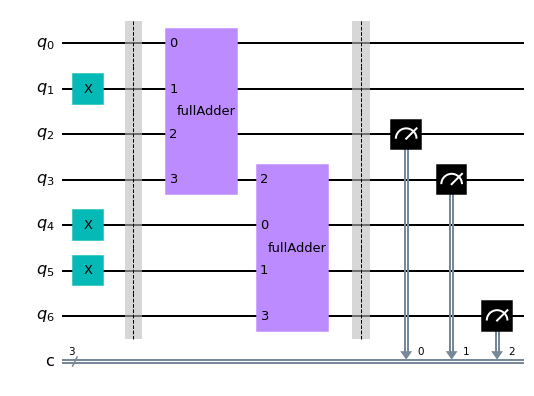

In [7]:
twoBitAdd.draw('mpl')

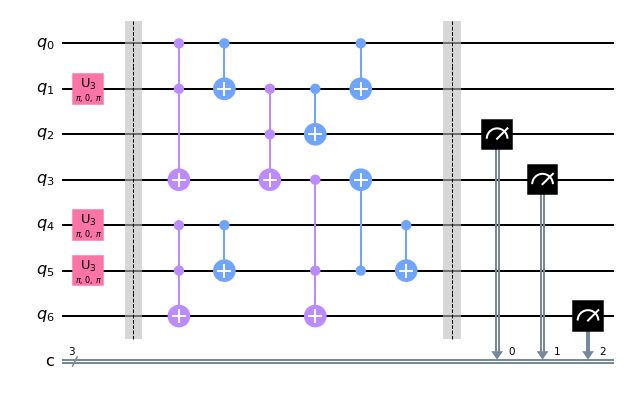

In [8]:
twoBitAdd.decompose().draw('mpl')

In [9]:
simulator=Aer.get_backend('qasm_simulator')
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

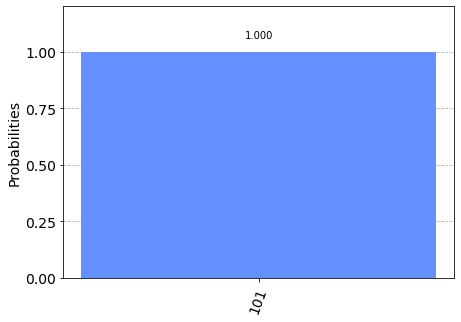

In [10]:
result=execute(twoBitAdd,backend=simulator).result()
plot_histogram(result.get_counts())